In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics as st
import arviz as az
import bambi as bmb
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import statsmodels.api as sm
import networkx as nx
import graphviz
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

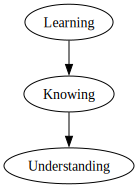

In [3]:
f = graphviz.Digraph()
f.edge("Learning", "Knowing")
f.edge("Knowing", "Understanding")
f

In [4]:
n = 1000  # sample size

# Simulating the variables
X = np.random.normal(0, 1, n)  # Learning
C = 5 * X + np.random.normal(0, 1, n)  # Knowing
Y = 3 * C + np.random.normal(0, 1, n)  # Understanding

df = pd.DataFrame()
df["X"] = X
df["C"] = C
df["Y"] = Y

df.head()


,X,C,Y
0,-0.413331,-2.361708,-7.015622
1,0.641425,4.765818,12.110524
2,-0.704162,-3.743219,-10.434771
3,0.717418,3.035988,10.268678
4,1.177480,6.680103,21.507804


In [5]:
mod1 = bmb.Model("Y ~ X", df)
results1 = mod1.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:02.775478


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1017.26it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1018.40it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1019.54it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1020.64it/s]


Sampling time = 0:00:02.287557


Transforming variables...


Transformation time = 0:00:00.063575


Computing Log Likelihood...


Log Likelihood time = 0:00:00.134534


In [6]:
az.summary(results1, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.02,0.10,-0.22,0.16,0.0,0.0,4069.30,3056.14,1.0
X,14.97,0.10,14.79,15.15,0.0,0.0,4356.32,2877.83,1.0
Y_sigma,3.17,0.07,3.05,3.31,0.0,0.0,4419.11,2915.24,1.0


In [7]:
mod2 = bmb.Model("Y ~ X + C", df)

In [8]:
results2 = mod2.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.030163


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7962.80it/s]

Running chain 0:  45%|███████████████████████▊                             | 900/2000 [00:01<00:00, 8308.93it/s]

Running chain 2:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7328.90it/s]

Running chain 3:  45%|███████████████████████▊                             | 900/2000 [00:01<00:00, 8205.23it/s]

Running chain 1:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 7967.57it/s]

Running chain 2:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 8080.78it/s]

Running chain 3:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 7919.87it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8338.38it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1275.03it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1275.81it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1276.80it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1277.72it/s]


Sampling time = 0:00:01.644610


Transforming variables...


Transformation time = 0:00:00.045069


Computing Log Likelihood...


Log Likelihood time = 0:00:00.119012


In [9]:
az.summary(results2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.01,0.03,-0.04,0.07,0.0,0.0,2845.46,1964.07,1.0
X,-0.16,0.16,-0.45,0.14,0.0,0.0,2179.49,2162.20,1.0
C,3.03,0.03,2.97,3.08,0.0,0.0,2133.77,2135.41,1.0
Y_sigma,0.99,0.02,0.95,1.03,0.0,0.0,2895.97,2109.98,1.0


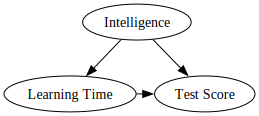

In [10]:
f = graphviz.Digraph()
with f.subgraph() as s:
    s.attr(rank='same')
    s.node("Learning Time")
    s.node("Test Score")

f.node("Intelligence")
f.edge("Intelligence", "Learning Time")
f.edge("Intelligence", "Test Score")
f.edge("Learning Time", "Test Score")

f

In [11]:
n = 1000  # sample size

# Simulating the variables
I = np.random.normal(100, 15, n)  # Intelligence
T = 200 - I + np.random.normal(0, 1, n)  # Learning Time
S = 0.5 * I + 0.1 * T + np.random.normal(0, 1, n)  # Test Score

df = pd.DataFrame()
df["I"] = I
df["T"] = T
df["S"] = S

df.head()

,I,T,S
0,115.839755,82.828187,65.942403
1,83.976895,115.331297,53.539842
2,112.826595,88.488595,65.916648
3,114.893009,85.400486,65.584730
4,88.463115,111.593801,56.221229


In [12]:
mod3 = bmb.Model("S ~ T", df)
results3 = mod3.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.695765


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1573.02it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1574.26it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1576.01it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1577.38it/s]


Sampling time = 0:00:01.451298


Transforming variables...


Transformation time = 0:00:00.038077


Computing Log Likelihood...


Log Likelihood time = 0:00:00.103442


In [13]:
az.summary(results3, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,100.30,0.24,99.87,100.75,0.0,0.0,5596.01,3178.15,1.0
T,-0.40,0.00,-0.41,-0.40,0.0,0.0,5778.08,3124.56,1.0
S_sigma,1.08,0.02,1.04,1.13,0.0,0.0,2861.40,2531.72,1.0


In [14]:
mod4 = bmb.Model("S ~ T + I", df)
results4 = mod4.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.628992


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3721.58it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3498.37it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3476.24it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3307.07it/s]

Running chain 3:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3804.88it/s]

Running chain 1:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3743.91it/s]

Running chain 2:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3639.15it/s]

Running chain 0:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 3627.52it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3754.98it/s]

Running chain 2:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3593.97it/s]

Running chain 1:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 3536.19it/s]

Running chain 0:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 3824.03it/s]

Running chain 3:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3747.36it/s]

Running chain 1:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3400.86it/s]

Running chain 2:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 3339.41it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 3918.84it/s]

Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 3689.25it/s]

Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 3288.06it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 3238.36it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1000.72it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1001.15it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1001.71it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1002.32it/s]


Sampling time = 0:00:02.073150


Transforming variables...


Transformation time = 0:00:00.043486


Computing Log Likelihood...


Log Likelihood time = 0:00:00.110596


In [15]:
az.summary(results4, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,6.91,6.41,-4.89,18.72,0.17,0.12,1348.23,1768.59,1.0
T,0.06,0.03,0.01,0.12,0.00,0.00,1347.83,1760.83,1.0
I,0.47,0.03,0.41,0.53,0.00,0.00,1346.72,1891.54,1.0
S_sigma,0.98,0.02,0.94,1.02,0.00,0.00,2349.54,2006.48,1.0


In [16]:
n = 1000  # Sample Size
network = np.random.normal(size=n)
competence = np.random.normal(size=n)

promotion = ((network > 1) | (competence > 1)).astype(int)
luck = np.random.binomial(1, 0.05, size=n)
promotion = (1 - luck) * promotion + luck * (1 - promotion)

df = pd.DataFrame()
df["P"] = promotion
df["N"] = network
df["C"] = competence

df.head()

,P,N,C
0,1,1.437706,-0.832861
1,0,-1.268704,-1.110777
2,1,1.935275,-0.659137
3,1,-0.540312,1.132108
4,0,-1.005933,-0.347699


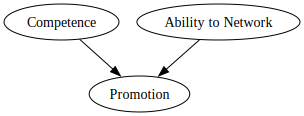

In [17]:
f = graphviz.Digraph()
f.edge("Competence", "Promotion")
f.edge("Ability to Network", "Promotion")
f

In [18]:
mod5 = bmb.Model("C ~ N", df)
results5 = mod5.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.716378


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1564.81it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1565.82it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1567.60it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1568.99it/s]


Sampling time = 0:00:01.350624


Transforming variables...


Transformation time = 0:00:00.038509


Computing Log Likelihood...


Log Likelihood time = 0:00:00.104421


In [19]:
az.summary(results5, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.03,0.03,-0.03,0.09,0.0,0.0,4548.57,2740.51,1.0
N,0.01,0.03,-0.05,0.07,0.0,0.0,3993.22,2941.76,1.0
C_sigma,1.03,0.02,0.99,1.07,0.0,0.0,4153.34,3244.06,1.0


In [20]:
mod6 = bmb.Model("C ~ N + P", df)
results6 = mod6.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.763325


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1454.76it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1455.78it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1457.14it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1458.35it/s]


Sampling time = 0:00:01.449072


Transforming variables...


Transformation time = 0:00:00.044138


Computing Log Likelihood...


Log Likelihood time = 0:00:00.110891


In [21]:
az.summary(results6, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.32,0.04,-0.39,-0.25,0.0,0.0,3762.98,3140.10,1.0
N,-0.20,0.03,-0.26,-0.14,0.0,0.0,4005.16,2745.77,1.0
P,1.01,0.07,0.88,1.14,0.0,0.0,3941.16,3295.22,1.0
C_sigma,0.93,0.02,0.89,0.97,0.0,0.0,4020.57,2866.35,1.0


In [22]:
only_promoted = df.loc[df["P"] == 1]

In [23]:
mod7 = bmb.Model("C ~ N", only_promoted)
results7 = mod7.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.742611


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1486.07it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1486.92it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1488.18it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1489.48it/s]


Sampling time = 0:00:01.418375


Transforming variables...


Transformation time = 0:00:00.038330


Computing Log Likelihood...


Log Likelihood time = 0:00:00.110567


In [24]:
az.summary(results7, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.82,0.07,0.70,0.95,0.0,0.0,4232.63,3310.01,1.0
N,-0.41,0.05,-0.51,-0.31,0.0,0.0,3633.20,3137.41,1.0
C_sigma,1.07,0.04,0.99,1.15,0.0,0.0,4086.03,2502.48,1.0


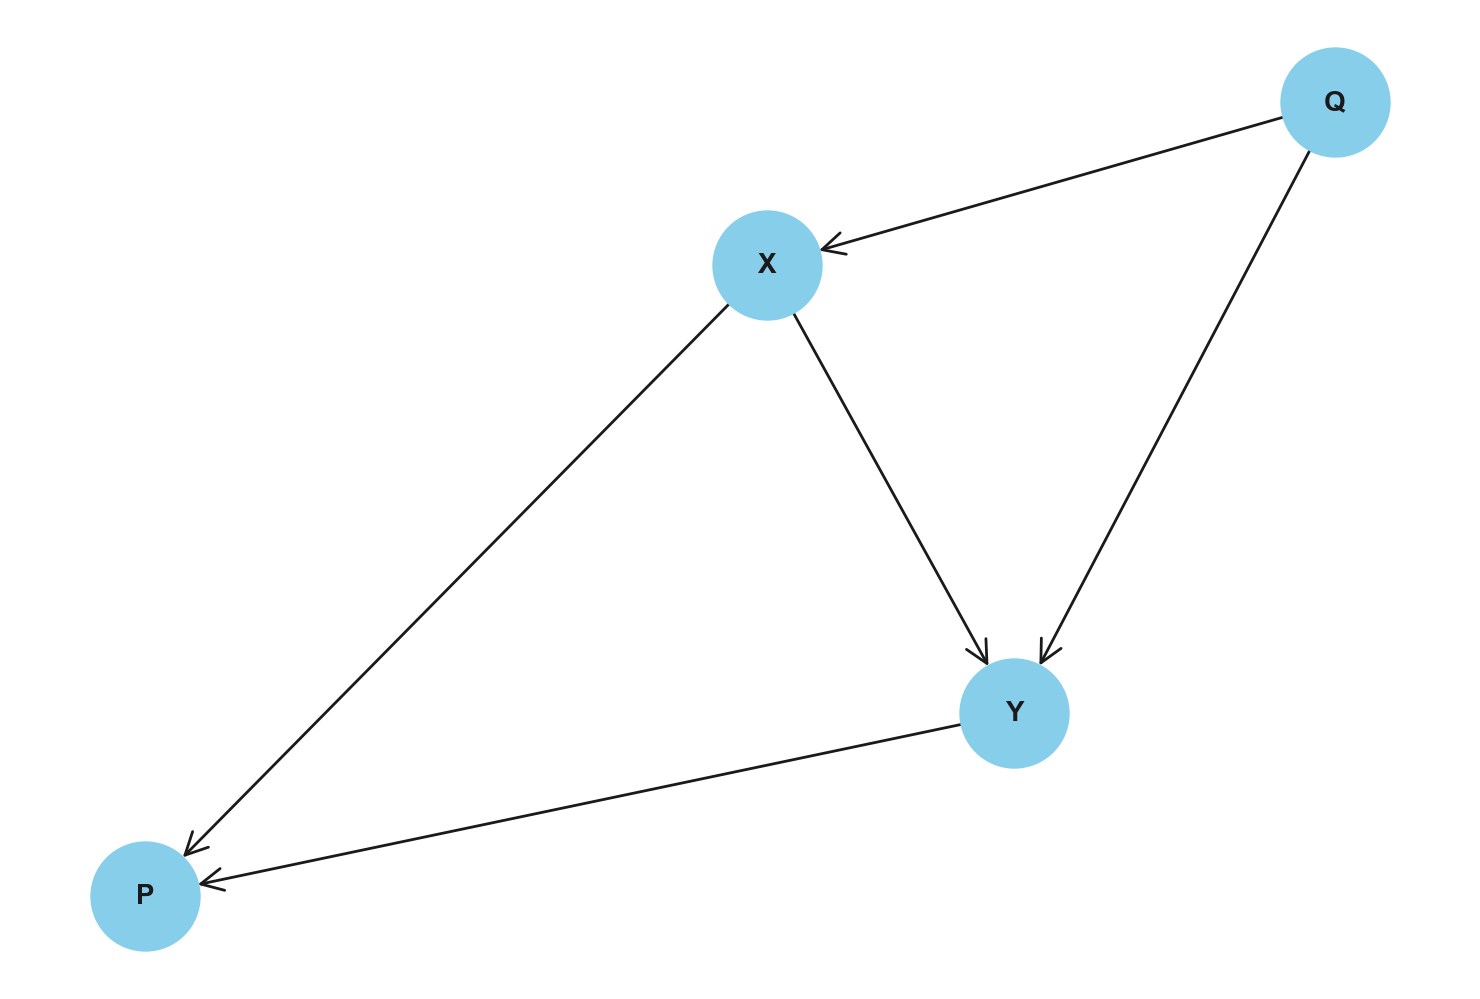

In [25]:
graph = nx.DiGraph()
#graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])
graph.add_edges_from([("X", "Y"), ("X", "P"), ("Y", "P"), ("Q", "X"), ("Q", "Y")])

# Draw the graph
pos = nx.spring_layout(graph, seed=42)  # Position nodes using spring layout algorithm
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20, arrowstyle="->")
plt.show()

In [26]:
N = 5_000
Q = rng.normal(size=N)
X = rng.normal(loc=0.14*Q, scale=0.4, size=N)
Y = rng.normal(loc=0.7*X + 0.11*Q, scale=0.24, size=N)
P = rng.normal(loc=0.43*X + 0.21*Y, scale=0.22, size=N)
df = pd.DataFrame({"Q": Q, "X": X, "Y": Y, "P": P})

df.head()

,Q,X,Y,P
0,-1.423825,-0.421305,-0.498653,0.039523
1,1.263728,0.518683,0.576752,0.059713
2,-0.870662,0.354544,0.157422,0.367875
3,-0.259173,0.135539,0.307791,0.016444
4,-0.075343,-0.048982,0.114759,0.134512


In [27]:
model = bmb.Model("Y ~ X", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.530202


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7963.52it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:01<00:00, 8773.82it/s]

Running chain 0:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7762.56it/s]

Running chain 2:  35%|██████████████████▌                                  | 700/2000 [00:01<00:00, 6742.32it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 9147.07it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8996.74it/s]

Running chain 2:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 8456.37it/s]

Running chain 1:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 9121.71it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1360.04it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1360.77it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1361.85it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1363.03it/s]


Sampling time = 0:00:01.540028


Transforming variables...


Transformation time = 0:00:00.042125


Computing Log Likelihood...


Log Likelihood time = 0:00:00.208115


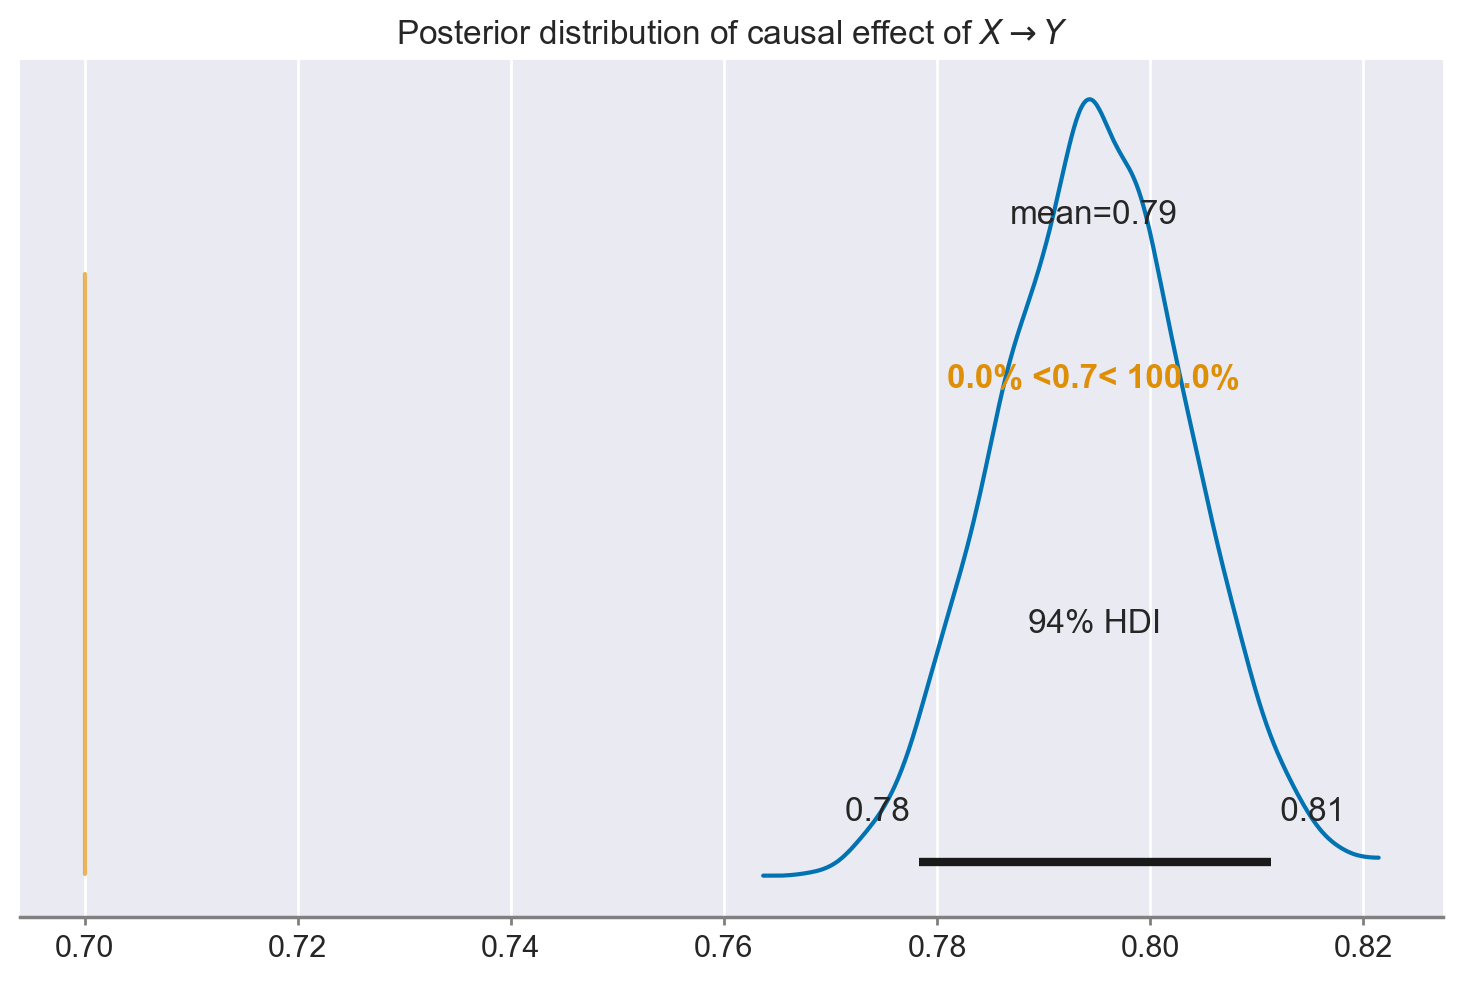

In [28]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [29]:
model = bmb.Model("Y ~ Q + X + P", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.862694


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3970.02it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3871.05it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3827.43it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3750.34it/s]

Running chain 0:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 5027.97it/s]

Running chain 3:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 5231.17it/s]

Running chain 2:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 5249.21it/s]

Running chain 1:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 5192.04it/s]

Running chain 0:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 5610.25it/s]

Running chain 2:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 5390.67it/s]

Running chain 1:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 5392.16it/s]

Running chain 3:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 5193.44it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1055.32it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1055.82it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1056.41it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1057.09it/s]


Sampling time = 0:00:01.982699


Transforming variables...


Transformation time = 0:00:00.049798


Computing Log Likelihood...


Log Likelihood time = 0:00:00.236191


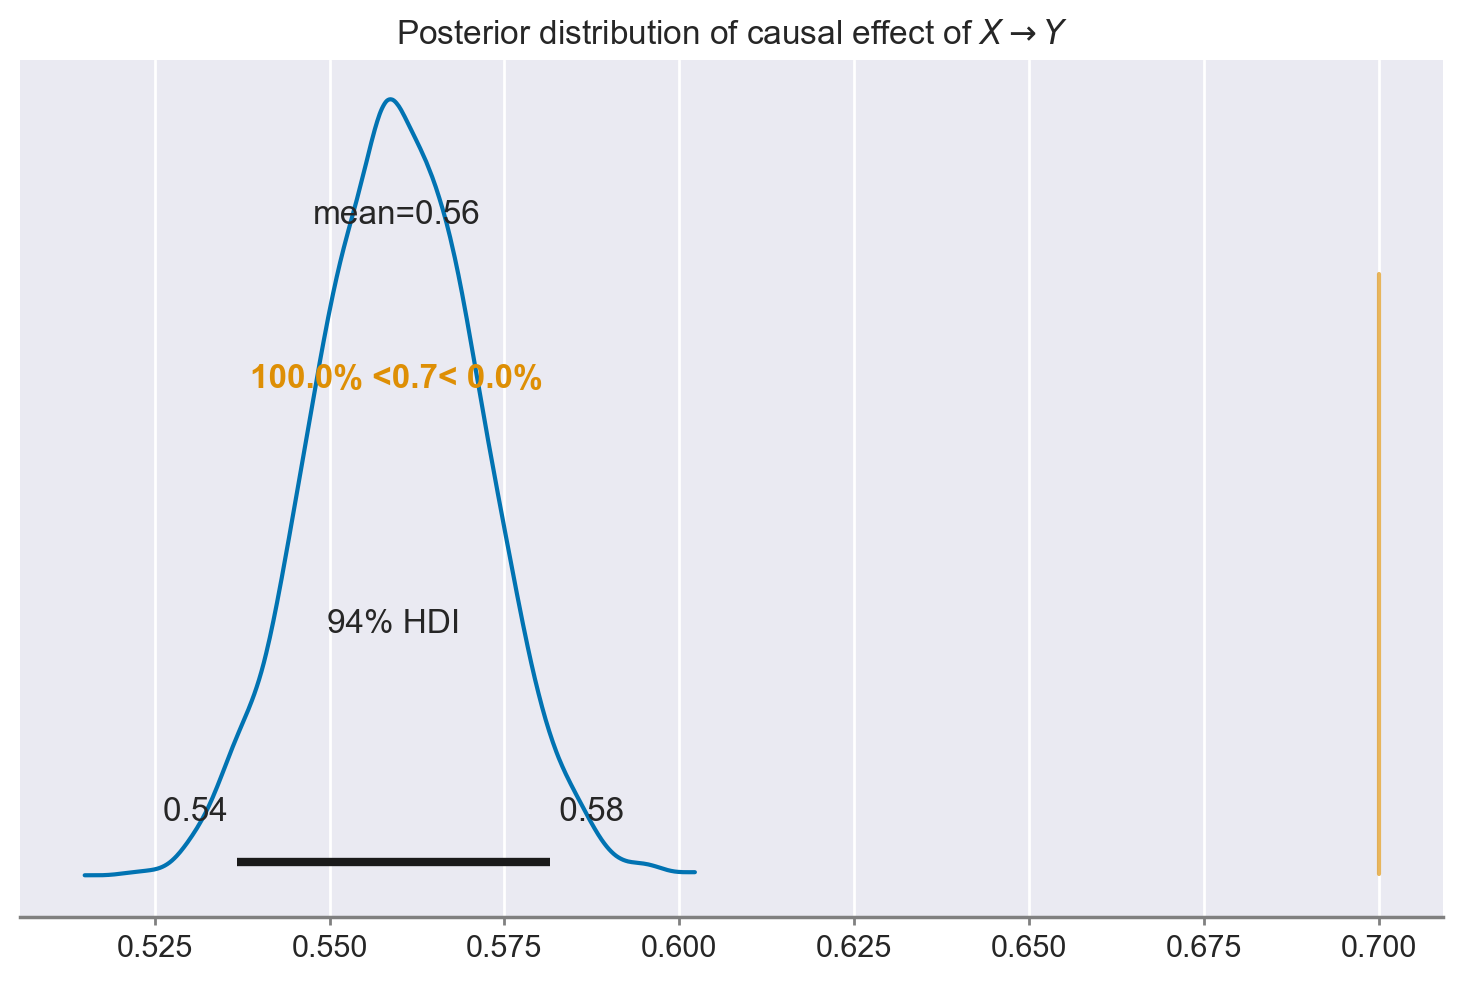

In [30]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [31]:
model = bmb.Model("Y ~ X + Q", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.613368


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4970.72it/s]

Running chain 0:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4882.72it/s]

Running chain 2:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4504.45it/s]

Running chain 1:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4343.78it/s]

Running chain 3:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6455.65it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 5908.26it/s]

Running chain 2:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6291.49it/s]

Running chain 1:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 5939.23it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 5867.00it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 6587.57it/s]

Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 6409.14it/s]

Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 6222.00it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1172.19it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1172.88it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1173.78it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1174.64it/s]


Sampling time = 0:00:01.792053


Transforming variables...


Transformation time = 0:00:00.210925


Computing Log Likelihood...


Log Likelihood time = 0:00:00.220758


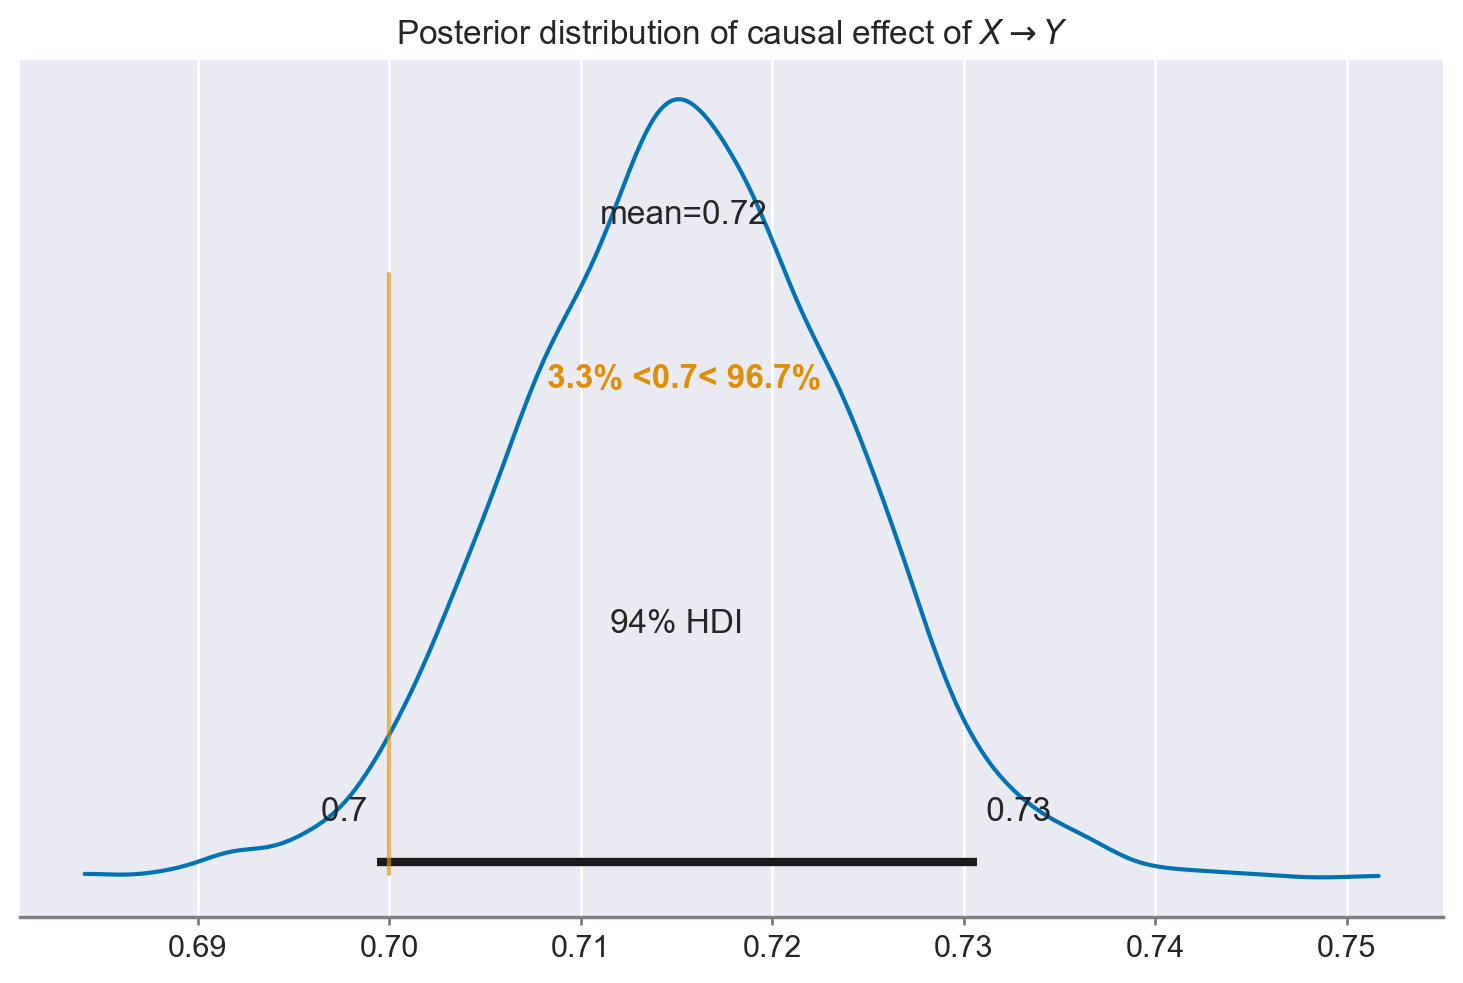

In [32]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

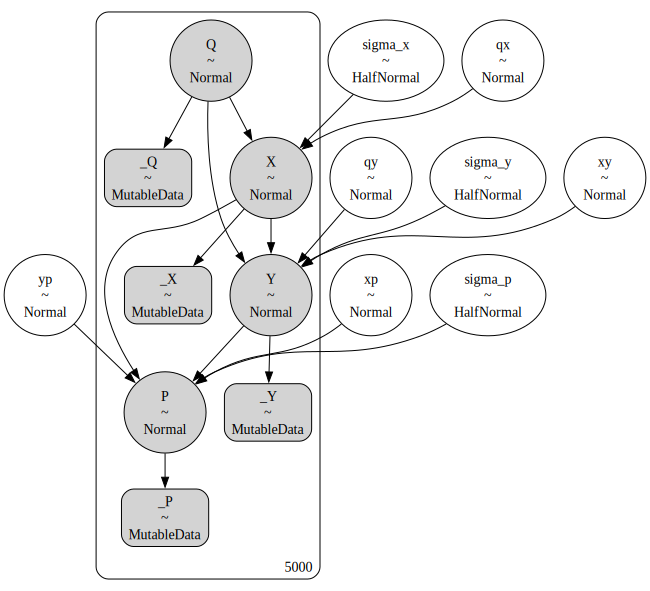

In [33]:
with pm.Model() as model:
    # data
    _Q = pm.MutableData("_Q", df["Q"])
    _X = pm.MutableData("_X", df["X"])
    _Y = pm.MutableData("_Y", df["Y"])
    _P = pm.MutableData("_P", df["P"])

    # priors on slopes
    # x ~ q
    qx = pm.Normal("qx")
    # y ~ x + q
    xy = pm.Normal("xy")
    qy = pm.Normal("qy")
    # p ~ x + y
    xp = pm.Normal("xp")
    yp = pm.Normal("yp")

    # priors on sd's
    sigma_x = pm.HalfNormal("sigma_x")
    sigma_y = pm.HalfNormal("sigma_y")
    sigma_p = pm.HalfNormal("sigma_p")
    
    # model
    Q = pm.Normal("Q", observed=_Q)
    X = pm.Normal("X", mu=qx*Q, sigma=sigma_x, observed=_X)
    Y = pm.Normal("Y", mu=xy*X + qy*Q, sigma=sigma_y, observed=_Y)
    P = pm.Normal("P", mu=xp*X + yp*Y, sigma=sigma_p, observed=_P)

pm.model_to_graphviz(model)

In [34]:
with model:
    idata = pm.sampling_jax.sample_numpyro_nuts(idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.461306


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   5%|██▋                                                   | 100/2000 [00:01<00:01, 999.42it/s]

Running chain 0:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1087.80it/s]

Running chain 1:  10%|█████▍                                                | 200/2000 [00:02<00:01, 980.74it/s]

Running chain 2:  10%|█████▍                                                | 200/2000 [00:02<00:01, 973.10it/s]

Running chain 3:  10%|█████▍                                                | 200/2000 [00:02<00:01, 933.55it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1391.85it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1324.54it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1314.59it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1293.06it/s]

Running chain 0:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1573.48it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1511.41it/s]

Running chain 2:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1505.91it/s]

Running chain 1:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1463.04it/s]

Running chain 0:  40%|█████████████████████▏                               | 800/2000 [00:02<00:00, 1691.38it/s]

Running chain 3:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1813.91it/s]

Running chain 2:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1828.15it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1733.67it/s]

Running chain 0:  55%|████████████████████████████▌                       | 1100/2000 [00:02<00:00, 1920.71it/s]

Running chain 1:  55%|████████████████████████████▌                       | 1100/2000 [00:02<00:00, 1722.90it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1943.79it/s]

Running chain 2:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1925.58it/s]

Running chain 0:  70%|████████████████████████████████████▍               | 1400/2000 [00:02<00:00, 2014.27it/s]

Running chain 1:  65%|█████████████████████████████████▊                  | 1300/2000 [00:02<00:00, 1737.05it/s]

Running chain 2:  70%|████████████████████████████████████▍               | 1400/2000 [00:02<00:00, 1939.10it/s]

Running chain 3:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 2020.32it/s]

Running chain 0:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 2054.59it/s]

Running chain 1:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 1727.05it/s]

Running chain 2:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 1985.80it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 2039.65it/s]

Running chain 1:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 1741.94it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 2086.03it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 2026.82it/s]

Running chain 1:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:03<00:00, 1754.78it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 647.14it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 647.35it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 647.61it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 647.87it/s]


Sampling time = 0:00:03.198958


Transforming variables...


Transformation time = 0:00:00.072205


Computing Log Likelihood...


Log Likelihood time = 0:00:00.687192


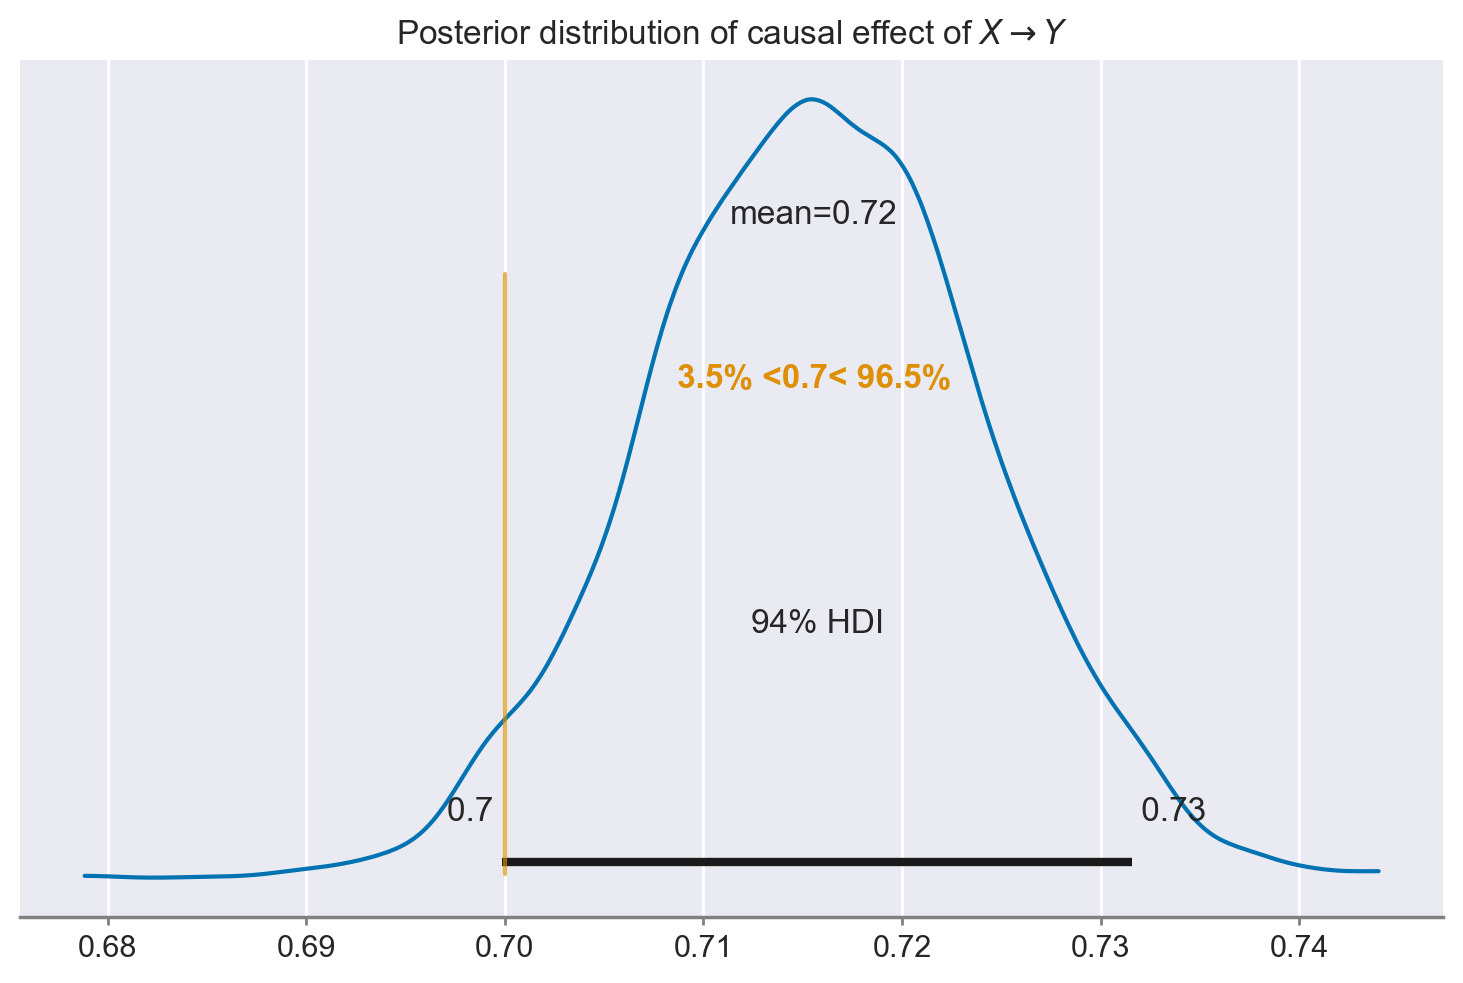

In [35]:
ax = az.plot_posterior(idata, var_names="xy", ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [36]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Tue Jan 30 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

seaborn    : 0.13.0
bambi      : 0.13.0
statsmodels: 0.14.1
pymc       : 5.10.3
matplotlib : 3.8.2
pandas     : 2.1.4
numpy      : 1.26.2
graphviz   : 0.20.1
arviz      : 0.17.0
networkx   : 3.2.1
scipy      : 1.11.4

Watermark: 2.4.3

